In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from tensorflow.keras.utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
base_skin_dir = os.path.join('..', 'Data')
print(base_skin_dir)
print(os.path)
print(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

..\Data
<module 'ntpath' from 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python310\\lib\\ntpath.py'>
..\Data\HAM10000_metadata.csv


In [ ]:

from glob import glob
print(os.path.splitext)
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

<function splitext at 0x0000016EDE593520>


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
print(os.path.join(base_skin_dir,'HAM10000_metadata.csv'))
df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
# Get list of directories in train_dir

# Create label_map dictionary
# label_map = {i: label for i, label in enumerate(labels)}
# num_classes=len(label_map)
# label_map


..\Data\HAM10000_metadata.csv


In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               6705      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         10015     


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

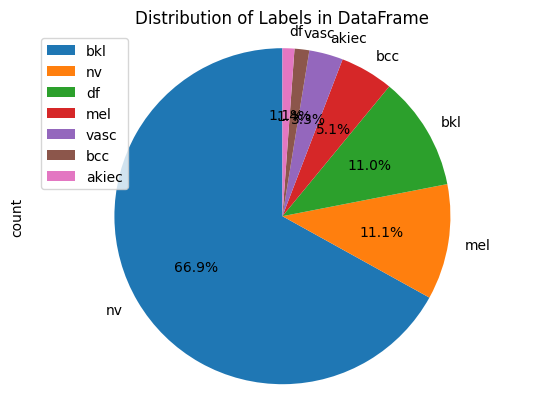

In [ ]:
# Plot pie chart of train_df
df['dx'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['dx'].unique())
plt.show()

In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               6705      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         10015     


In [ ]:
max_images_per_class = 3500

# Group by label column and take first max_images_per_class rows for each group
df = df.groupby("dx").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

In [ ]:
import tensorflow as tf

# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [ ]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

8

In [ ]:

df['path'] = df['image_id'].map(imageid_path_dict.get) #Image Local Path
df['cell_type'] = df['dx'].map(lesion_type_dict.get) #Full 'dx' name
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes #Unique code for each 'dx'
print(df)

        lesion_id      image_id     dx    dx_type   age     sex   
0     HAM_0002644  ISIC_0029417  akiec      histo  80.0  female  \
1     HAM_0006002  ISIC_0029915  akiec      histo  50.0  female   
2     HAM_0000549  ISIC_0029360  akiec      histo  70.0    male   
3     HAM_0000549  ISIC_0026152  akiec      histo  70.0    male   
4     HAM_0000673  ISIC_0029659  akiec      histo  70.0  female   
...           ...           ...    ...        ...   ...     ...   
6805  HAM_0000415  ISIC_0025680   vasc  consensus  55.0  female   
6806  HAM_0004413  ISIC_0026068   vasc  consensus  55.0  female   
6807  HAM_0004257  ISIC_0025452   vasc  consensus  55.0  female   
6808  HAM_0003829  ISIC_0026349   vasc  consensus  60.0  female   
6809  HAM_0005560  ISIC_0027269   vasc  consensus  60.0  female   

         localization                                             path   
0                neck  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  \
1                face  ..\Data\HAM10000_images_

In [ ]:
import concurrent.futures

# Define a function to resize image arrays
def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((100,75)))

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['path'].tolist()))

# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays

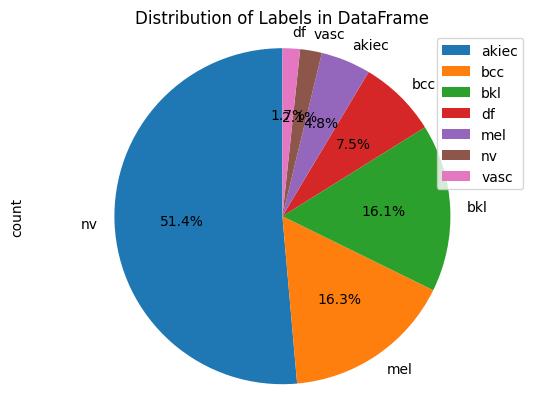

In [ ]:
# Plot pie chart of train_df
df['dx'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['dx'].unique())
plt.show()

In [ ]:
df.head()

lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                        path          cell_type   
0  ..\Data\Segmented_Images\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\Segmented_Images\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\Segmented_Images\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\Segmented_Images\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\Segmented_Images\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  
0              0  [[[15, 5, 73], [19, 5, 42], [18, 5, 46], [19, ...  
1              0  [[[7, 3, 68], [9, 2, 35], [10, 2, 37], [10, 2,...  
2              0  [[[6, 3, 68], [6, 2, 35], [6, 2, 36], [6, 2, 3...  
3              0  [[[114, 95, 179], [152, 129, 184], [154, 132, ...  
4              0  [[[88, 49, 151], [104, 46, 86], [96, 36, 75], ...

In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               3500      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         6810      


In [ ]:
num_classes=len(lesion_type_dict)

In [ ]:
label_map = {'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3, 'akiec': 4, 'vasc': 5, 'df': 6}
# Map values in 'dx' column to integer labels using the dictionary
df['label'] = df['dx'].map(label_map)

In [ ]:
df.head()

lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                              path          cell_type   
0  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\HAM10000_images_part_2\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\HAM10000_images_part_2\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\HAM10000_images_part_1\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\HAM10000_images_part_2\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  label  
0              0  [[[30, 15, 19], [32, 16, 21], [32, 16, 21], [3...      4  
1              0  [[[28, 14, 14], [31, 15, 15], [35, 19, 19], [4...      4  
2              0  [[[17, 7, 12], [20, 9, 12], [21, 10, 14], [29,...      4  
3              0  [[[187, 162, 192], [191, 167, 195], [193, 167,...      4  
4              0  [[[194, 129, 131], [189, 121, 120], [186, 118,...      4

In [ ]:
unique_labels = df['label'].unique()
print(unique_labels)


[4 3 2 6 1 0 5]


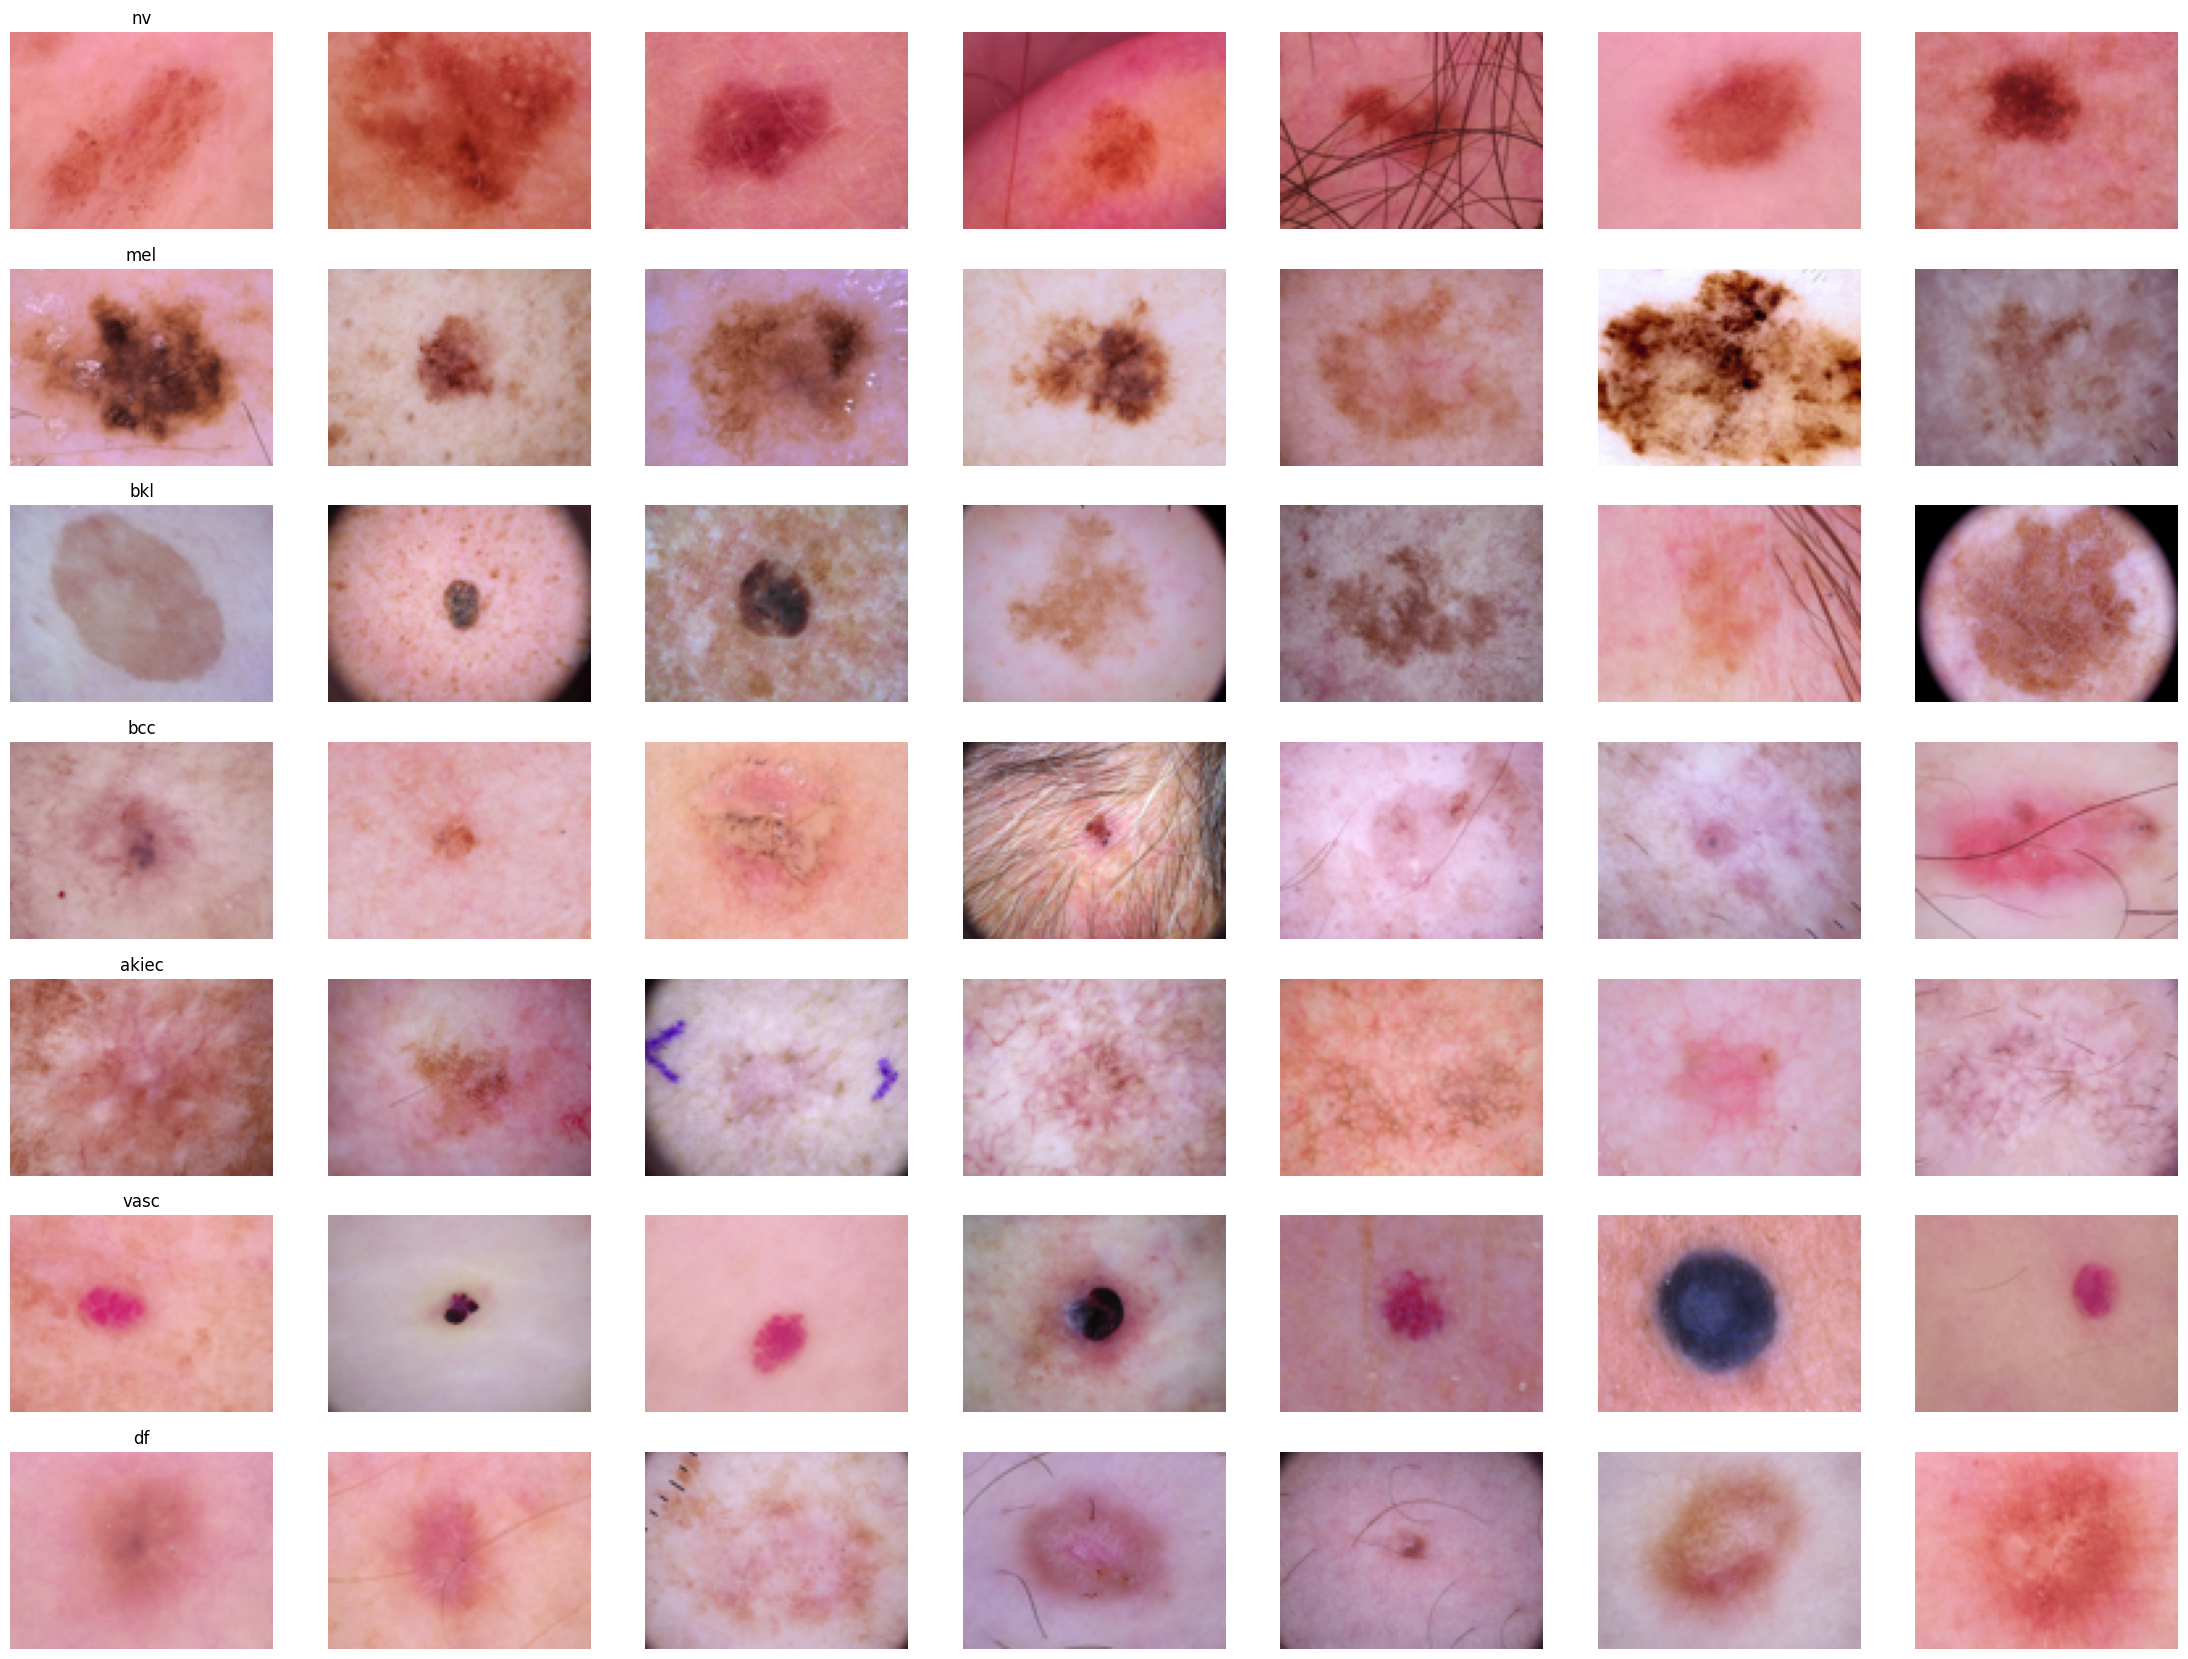

In [ ]:
# Reverse the label_map dictionary to map integer labels to class names
lesion_type_dict = {v: k for k, v in label_map.items()}

# Plotting code
n_samples = 7
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(4*n_samples, 3*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = lesion_type_dict[class_idx] # get the class name using lesion_type_dict
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [ ]:
print(df.head())
df['image'].map(lambda x: x.shape).value_counts()

     lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                              path          cell_type   
0  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\HAM10000_images_part_2\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\HAM10000_images_part_2\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\HAM10000_images_part_1\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\HAM10000_images_part_2\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  label  
0              

image
(75, 100, 3)    6810
Name: count, dtype: int64

In [ ]:
df.head()

lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                              path          cell_type   
0  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\HAM10000_images_part_2\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\HAM10000_images_part_2\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\HAM10000_images_part_1\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\HAM10000_images_part_2\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  label  
0              0  [[[30, 15, 19], [32, 16, 21], [32, 16, 21], [3...      4  
1              0  [[[28, 14, 14], [31, 15, 15], [35, 19, 19], [4...      4  
2              0  [[[17, 7, 12], [20, 9, 12], [21, 10, 14], [29,...      4  
3              0  [[[187, 162, 192], [191, 167, 195], [193, 167,...      4  
4              0  [[[194, 129, 131], [189, 121, 120], [186, 118,...      4

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import numpy as np

# Generate synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 900, 1: 900}


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator object with the desired transformations
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')
# Create an ImageDataGenerator object with the desired transformations

# GAN Method
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import os
from skimage import io

# Define the generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the discriminator
def compile_discriminator(discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN
def compile_gan(gan):
    gan.compile(optimizer='adam', loss='binary_crossentropy')

# Define a function to train the GAN
def train_gan(generator, discriminator, gan, images, epochs=100, batch_size=128, latent_dim=100):
    for epoch in range(epochs):
        # Generate random noise samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        # Generate fake images using the generator
        fake_images = generator.predict(noise)
        # Select a random batch of real images
        idx = np.random.randint(0, images.shape[0], batch_size)
        real_images = images[idx]
        # Combine real and fake images into a single batch
        X = np.concatenate([real_images, fake_images])
        # Labels for real and fake images
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, y_real)
        d_loss_fake = discriminator.train_on_batch(fake_images, y_fake)
        # Train the generator via the GAN model
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gan = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, y_gan)
        # Print progress
        print(f"Epoch {epoch+1}/{epochs} | Discriminator Loss: {0.5 * np.add(d_loss_real, d_loss_fake)} | Generator Loss: {g_loss}")

# Load the dataset (e.g., MNIST)
def load_dataset(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory, filename)
            image = io.imread(image_path)
            images.append(image)
    return np.array(images)

# Preprocess the images
def preprocess_images(images):
    # Normalize and reshape the images
    images = images.astype('float32') / 255.0
    images = np.expand_dims(images, axis=-1)
    return images

# Main function
def main():
    # Define parameters
    latent_dim = 100
    epochs = 10
    batch_size = 128
    image_directory = "F:/Capstone/Code_final/Data/HAM10000_images_part_1"

    # Load and preprocess the dataset
    images = load_dataset(image_directory)
    images = preprocess_images(images)

    # Define and compile the discriminator
    discriminator = build_discriminator((28, 28, 1))
    compile_discriminator(discriminator)

    # Define and compile the GAN
    generator = build_generator(latent_dim)
    gan = build_gan(generator, discriminator)
    compile_gan(gan)

    # Train the GAN
    train_gan(generator, discriminator, gan, images, epochs=epochs, batch_size=batch_size, latent_dim=latent_dim)

# Entry point of the script
if __name__ == "__main__":
    main()
datagen = ImageDataGenerator(featurewise_center=False, 
                            samplewise_center=False, 
                            featurewise_std_normalization=False, 
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            zca_epsilon=1e-06, 
                            rotation_range=20, 
                            width_shift_range=0.2, 
                            height_shift_range=0.2, 
                            brightness_range=None, 
                            shear_range=0.1, 
                            zoom_range=0.1, 
                            channel_shift_range=0.1, 
                            fill_mode='nearest', 
                            cval=0.0, 
                            horizontal_flip=False, 
                            vertical_flip=False, 
                            rescale=None, 
                            preprocessing_function=None, 
                            data_format='channels_last', 
                            validation_split=0.0, 
                            interpolation_order=1, 
                            dtype='float32')

In [ ]:
# Create an empty dataframe to store the augmented images
augmented_df = pd.DataFrame(columns=['path', 'label', 'image'])

# Loop through each class label and generate additional images if needed
for class_label in df['label'].unique():
    # Get the image arrays for the current class
    image_arrays = df.loc[df['label'] == class_label, 'image'].values
        # Calculate the number of additional images needed for the current class
    num_images_needed = max_images_per_class - len(image_arrays)
     # Generate augmented images for the current class
    if num_images_needed > 0:
        # Select a random subset of the original images
        selected_images = np.random.choice(image_arrays, size=num_images_needed)

          # Apply transformations to the selected images and add them to the augmented dataframe
        for image_array in selected_images:
            # Reshape the image array to a 4D tensor with a batch size of 1
            image_tensor = np.expand_dims(image_array, axis=0)

            # Generate the augmented images
            augmented_images = datagen.flow(image_tensor, batch_size=1)
            # Extract the augmented image arrays and add them to the augmented dataframe
            for i in range(augmented_images.n):
                augmented_image_array = augmented_images.next()[0].astype('uint8')
                augmented_df = augmented_df._append({'path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)



     # Add the original images for the current class to the augmented dataframe
    original_images_df = df.loc[df['label'] == class_label, ['path', 'label', 'image']]
    augmented_df = augmented_df._append(original_images_df, ignore_index=True)

# Group the augmented dataframe by the 'label' column and filter out extra images
df = augmented_df.groupby('label').head(max_images_per_class)

del augmented_df

# Use the augmented dataframe for further processing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()
print(class_counts)
# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

label
0    3500
1    3500
2    3500
3    3500
4    3500
5    3500
6    3500
Name: count, dtype: int64
Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               nv                             3500      
1               mel                            3500      
2               bkl                            3500      
3               bcc                            3500      
4               akiec                          3500      
5               vasc                           3500      
6               df                             3500      
------------------------------------------------------------
Total                                         24500     


In [ ]:
features = df.drop(columns=['label','path'],axis=1)
target = df['label']

In [ ]:
features.head()

image
0  [[[38, 22, 25], [39, 24, 27], [47, 30, 33], [6...
1  [[[208, 173, 185], [210, 175, 189], [213, 179,...
2  [[[165, 115, 112], [164, 114, 112], [163, 113,...
3  [[[154, 126, 125], [156, 127, 127], [158, 130,...
4  [[[241, 215, 226], [241, 215, 226], [241, 215,...

In [ ]:
target.head()

0    1
1    5
2    4
3    1
4    5
Name: label, dtype: object

In [ ]:
print(target.shape,features.shape)

(24500,) (24500, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20,shuffle=True)

In [ ]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std


In [ ]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train,num_classes = num_classes)
y_test = to_categorical(y_test,num_classes = num_classes)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2,shuffle=True)

In [ ]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [ ]:
y_train = y_train.astype(int)
y_validate = y_validate.astype(int)

In [ ]:
# Calculate the number of images in each class for train, validation, and test datasets
train_counts = np.sum(y_train, axis=0)
val_counts = np.sum(y_validate, axis=0)
test_counts = np.sum(y_test, axis=0)

# Print the number of images in each class for train, validation, and test datasets
print("Dataset Summary")
print("-" * 90)
print(f"{'Class Label':<15} {'Class Name':<30} {'Train':<10} {'Validation':<12} {'Test':<10} {'Total':<10}")
print("-" * 90)

# Iterate over each class label
for i, class_name in enumerate(label_map.values()):
    class_label = list(label_map.keys())[i]
    train_num = int(train_counts[i])
    val_num = int(val_counts[i])
    test_num = int(test_counts[i])
    total_num = train_num + val_num + test_num
    print(f"{class_label:<15} {class_name:<30} {train_num:<10} {val_num:<12} {test_num:<10} {total_num:<10}")

print("-" * 90)

# Print the total number of images
total_train = np.sum(train_counts)
total_val = np.sum(val_counts)
total_test = np.sum(test_counts)
total_images = total_train + total_val + total_test
print(f"{'Total':<46} {total_train:<10} {total_val:<12} {total_test:<10} {total_images:<10}")


Dataset Summary
------------------------------------------------------------------------------------------
Class Label     Class Name                     Train      Validation   Test       Total     
------------------------------------------------------------------------------------------
nv              0                              2232       540          728        3500      
mel             1                              2185       575          740        3500      
bkl             2                              2246       567          687        3500      
bcc             3                              2221       567          712        3500      
akiec           4                              2257       552          691        3500      
vasc            5                              2230       571          699        3500      
df              6                              2309       548          643        3500      
----------------------------------------------------------

In [ ]:
df.groupby('label').size()

label
0    3500
1    3500
2    3500
3    3500
4    3500
5    3500
6    3500
dtype: int64

In [ ]:
input_shape = df['image'][0].shape

In [ ]:
dense_model = keras.models.load_model("/Users/pinaligabani/Downloads/Code/Data/Data/Densenet.h5")
inceptionv3_model = keras.models.load_model("/Users/pinaligabani/Downloads/Code/Data/Finetune_InceptionV3.h5")
vgg16_model = keras.models.load_model("/Users/pinaligabani/Downloads/Code/Data/Finetune_VGG16.h5")
ensemble_model=keras.models.load_model("/Users/pinaligabani/Downloads/Code/Data/Finetune_Ensemble.h5")

In [ ]:
import matplotlib.pyplot as plt

# Accuracy and loss values for each epoch (replace these with your actual values)
train_accuracy_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Example values for training accuracy
val_accuracy_values = [0.4, 0.5, 0.6, 0.7, 0.8]  # Example values for validation accuracy
train_loss_values = [0.8, 0.7, 0.6, 0.5, 0.4]  # Example values for training loss
val_loss_values = [1.0, 0.9, 0.8, 0.7, 0.6]  # Example values for validation loss

# Plot accuracy
plt.plot(range(1, len(train_accuracy_values) + 1), train_accuracy_values, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_values) + 1), val_accuracy_values, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, len(train_loss_values) + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, len(val_loss_values) + 1), val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Train Accuracy

In [90]:
loss, accuracy = dense_model.evaluate(x_train, y_train, verbose=1)
print("DenseNet Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = inceptionv3_model.evaluate(x_train, y_train, verbose=1)
print("InceptionV3 Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = vgg16_model.evaluate(x_train, y_train, verbose=1)
print("VGG16 Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = ensemble_model.evaluate(x_train, y_train, verbose=1)
print("Ensemble Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

350/350 [==============================] - 70s 194ms/step - loss: 0.2134 - accuracy: 0.9657
DenseNet Train: accuracy = 0.965714  ;  loss = 0.213369
350/350 [==============================] - 24s 68ms/step - loss: 0.1685 - accuracy: 0.9442
InceptionV3 Train: accuracy = 0.944196  ;  loss = 0.168487
350/350 [==============================] - 190s 541ms/step - loss: 0.1611 - accuracy: 0.9591
VGG16 Train: accuracy = 0.959107  ;  loss = 0.161087
350/350 [==============================] - 255s 724ms/step - loss: 0.3941 - accuracy: 0.9790
Ensemble Train: accuracy = 0.979018  ;  loss = 0.394089


### Test Accuracy

In [ ]:
loss, accuracy = dense_model.evaluate(x_test, y_test, verbose=1)
print("DenseNet Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = inceptionv3_model.evaluate(x_test, y_test, verbose=1)
print("InceptionV3 Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = vgg16_model.evaluate(x_test, y_test, verbose=1)
print("VGG16 Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = ensemble_model.evaluate(x_test, y_test, verbose=1)
print("Ensemble Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

110/110 [==============================] - 25s 213ms/step - loss: 0.1989 - accuracy: 0.9607
DenseNet Test: accuracy = 0.960714  ;  loss = 0.198926
110/110 [==============================] - 9s 77ms/step - loss: 0.1730 - accuracy: 0.9454
InceptionV3 Test: accuracy = 0.945429  ;  loss = 0.173037
110/110 [==============================] - 57s 514ms/step - loss: 0.1714 - accuracy: 0.9583
VGG16 Test: accuracy = 0.953286  ;  loss = 0.171369
110/110 [==============================] - 83s 746ms/step - loss: 0.3931 - accuracy: 0.9814
Ensemble Test: accuracy = 0.981429  ;  loss = 0.393099


### Validation Accuracy

In [ ]:
loss, accuracy = dense_model.evaluate(x_validate, y_validate, verbose=1)
print("DenseNet Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = inceptionv3_model.evaluate(x_validate, y_validate, verbose=1)
print("InceptionV3 Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = vgg16_model.evaluate(x_validate, y_validate, verbose=1)
print("VGG16 Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss, accuracy = ensemble_model.evaluate(x_validate, y_validate, verbose=1)
print("Ensemble Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

88/88 [==============================] - 21s 226ms/step - loss: 0.1869 - accuracy: 0.9604
DenseNet Validation: accuracy = 0.960357  ;  loss = 0.186871
88/88 [==============================] - 8s 83ms/step - loss: 0.1736 - accuracy: 0.9468
InceptionV3 Validation: accuracy = 0.946786  ;  loss = 0.173569
88/88 [==============================] - 47s 540ms/step - loss: 0.1795 - accuracy: 0.9491
VGG16 Validation: accuracy = 0.949143  ;  loss = 0.179545
88/88 [==============================] - 76s 858ms/step - loss: 0.3943 - accuracy: 0.9800
Ensemble Validation: accuracy = 0.980000  ;  loss = 0.394287


### Classification Report

### VGG16 Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
class_names=['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from tensorflow.keras.utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
# Train the model
history = vgg16_model.fit(x_train, y_train)

# Make predictions using the trained model
y_predict = vgg16_model.predict(x_test)


110/110 [==============================] - 118s 1s/step


In [ ]:
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)

# Print classification report and confusion matrix
print(classification_report(np.argmax(y_test, axis=1), y_predict_classes, target_names=class_names))
print(confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes))

              precision    recall  f1-score   support

          nv       0.99      1.00      0.99       495
         mel       0.94      0.94      0.94       509
         bkl       0.94      0.92      0.93       479
         bcc       1.00      0.96      0.98       520
       akiec       0.93      0.98      0.95       477
        vasc       1.00      1.00      1.00       500
          df       0.99      1.00      1.00       520

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500

[[493   0   2   0   0   0   0]
 [  3 481  16   0   8   0   1]
 [  1  24 442   1  10   0   1]
 [  0   1   6 497  15   0   1]
 [  0   8   2   1 466   0   0]
 [  0   0   1   0   0 499   0]
 [  0   0   0   0   0   0 520]]


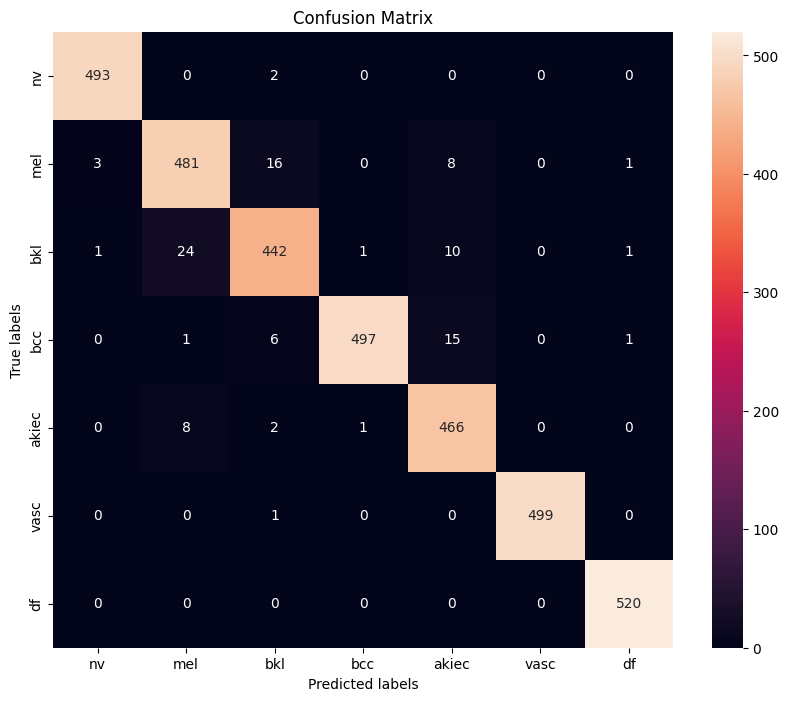

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes)

# Plot the confusion matrix using Seaborn
# sns.heatmap(cm, annot=True, cmap='Blues')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

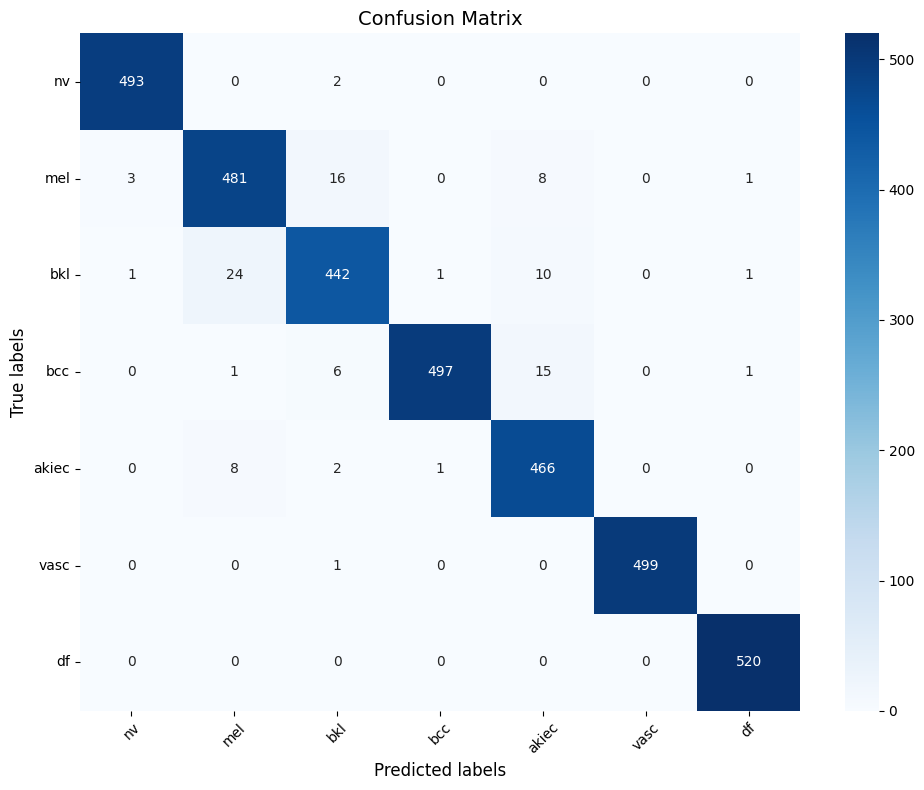

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
import numpy as np

# Assuming y_predict and y_test are arrays containing predicted and true labels respectively
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Initialize variables to store TP, TN, FP, FN for each class
TP = np.zeros(7)
TN = np.zeros(7)
FP = np.zeros(7)
FN = np.zeros(7)

# Calculate TP, TN, FP, FN for each class
for i in range(7):
    TP[i] = np.sum((y_predict_classes == i) & (y_test_classes == i))
    TN[i] = np.sum((y_predict_classes != i) & (y_test_classes != i))
    FP[i] = np.sum((y_predict_classes == i) & (y_test_classes != i))
    FN[i] = np.sum((y_predict_classes != i) & (y_test_classes == i))

# Calculate total TP, TN, FP, FN across all classes
total_TP = np.sum(TP)
total_TN = np.sum(TN)
total_FP = np.sum(FP)
total_FN = np.sum(FN)

print("Total True Positives (TP):", total_TP)
print("Total True Negatives (TN):", total_TN)
print("Total False Positives (FP):", total_FP)
print("Total False Negatives (FN):", total_FN)


Total True Positives (TP): 3398.0
Total True Negatives (TN): 20898.0
Total False Positives (FP): 102.0
Total False Negatives (FN): 102.0


### InceptionV3 Classification report

In [ ]:
# Train the model
history = inceptionv3_model.fit(x_train, y_train)

# Make predictions using the trained model
y_predict = inceptionv3_model.predict(x_test)

110/110 [==============================] - 37s 338ms/step


In [ ]:
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)

# Print classification report and confusion matrix
print(classification_report(np.argmax(y_test, axis=1), y_predict_classes, target_names=class_names))
print(confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes))

              precision    recall  f1-score   support

          nv       0.91      0.98      0.94       495
         mel       0.93      0.85      0.89       509
         bkl       0.85      0.88      0.86       479
         bcc       0.96      0.92      0.94       520
       akiec       0.91      0.96      0.93       477
        vasc       0.99      0.94      0.96       500
          df       0.98      0.99      0.99       520

    accuracy                           0.93      3500
   macro avg       0.93      0.93      0.93      3500
weighted avg       0.93      0.93      0.93      3500

[[487   0   7   0   0   1   0]
 [ 12 433  46   5  10   2   1]
 [  8  23 420   9  17   0   2]
 [  2   4  13 477  17   3   4]
 [  0   5   5   5 458   0   4]
 [ 27   1   3   0   0 469   0]
 [  0   0   1   0   1   1 517]]


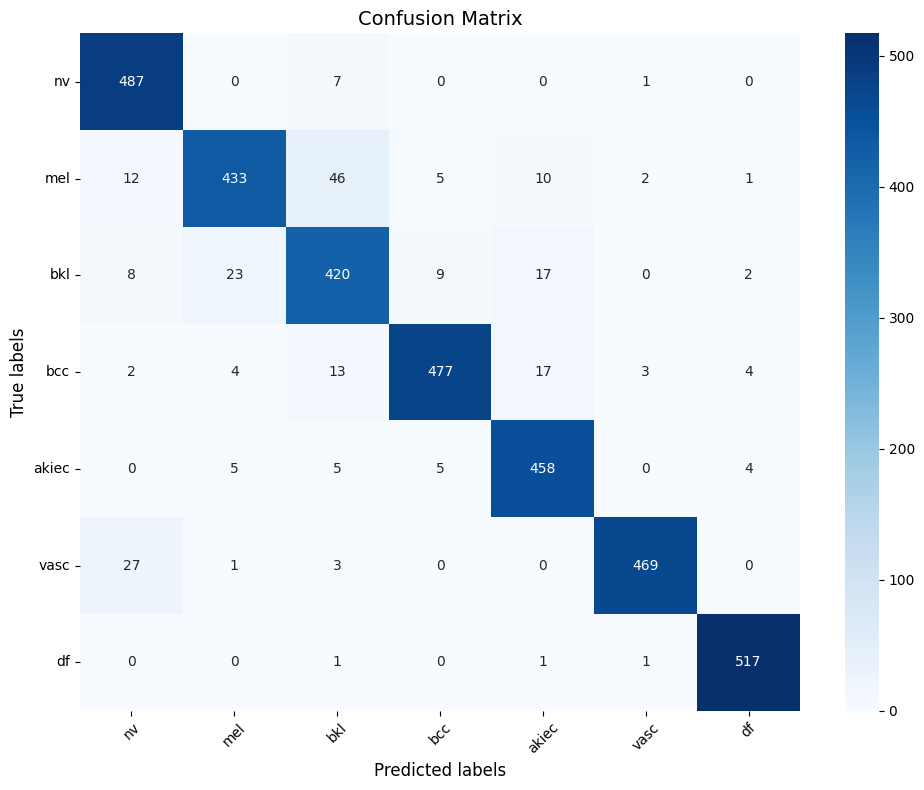

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
import numpy as np

# Assuming y_predict and y_test are arrays containing predicted and true labels respectively
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Initialize variables to store TP, TN, FP, FN for each class
TP = np.zeros(7)
TN = np.zeros(7)
FP = np.zeros(7)
FN = np.zeros(7)

# Calculate TP, TN, FP, FN for each class
for i in range(7):
    TP[i] = np.sum((y_predict_classes == i) & (y_test_classes == i))
    TN[i] = np.sum((y_predict_classes != i) & (y_test_classes != i))
    FP[i] = np.sum((y_predict_classes == i) & (y_test_classes != i))
    FN[i] = np.sum((y_predict_classes != i) & (y_test_classes == i))

# Calculate total TP, TN, FP, FN across all classes
total_TP = np.sum(TP)
total_TN = np.sum(TN)
total_FP = np.sum(FP)
total_FN = np.sum(FN)

print("Total True Positives (TP):", total_TP)
print("Total True Negatives (TN):", total_TN)
print("Total False Positives (FP):", total_FP)
print("Total False Negatives (FN):", total_FN)


Total True Positives (TP): 3289.0
Total True Negatives (TN): 20789.0
Total False Positives (FP): 211.0
Total False Negatives (FN): 211.0


### DenseNet Classification report

In [ ]:
# Train the model
history = dense_model.fit(x_train, y_train)

# Make predictions using the trained model
y_predict = dense_model.predict(x_test)

110/110 [==============================] - 98s 889ms/step


In [ ]:
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)

# Print classification report and confusion matrix
print(classification_report(np.argmax(y_test, axis=1), y_predict_classes, target_names=class_names))
print(confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes))

              precision    recall  f1-score   support

          nv       1.00      1.00      1.00       495
         mel       0.99      0.98      0.98       509
         bkl       0.99      0.97      0.98       479
         bcc       0.99      1.00      0.99       520
       akiec       0.98      1.00      0.99       477
        vasc       1.00      1.00      1.00       500
          df       1.00      1.00      1.00       520

    accuracy                           0.99      3500
   macro avg       0.99      0.99      0.99      3500
weighted avg       0.99      0.99      0.99      3500

[[493   1   1   0   0   0   0]
 [  1 497   6   1   3   1   0]
 [  0   6 466   3   4   0   0]
 [  0   0   0 518   2   0   0]
 [  0   0   0   0 477   0   0]
 [  0   0   0   0   0 500   0]
 [  0   0   0   0   0   0 520]]


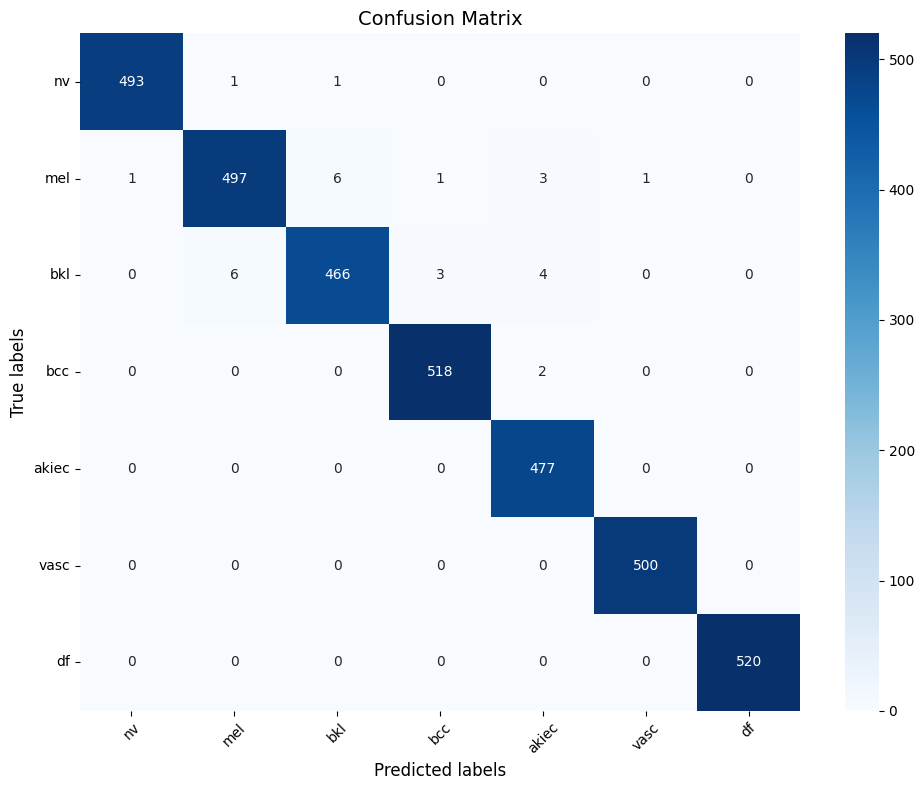

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping of labels
plt.show()


In [93]:
import numpy as np

# Assuming y_predict and y_test are arrays containing predicted and true labels respectively
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Initialize variables to store TP, TN, FP, FN for each class
TP = np.zeros(7)
TN = np.zeros(7)
FP = np.zeros(7)
FN = np.zeros(7)

# Calculate TP, TN, FP, FN for each class
for i in range(7):
    TP[i] = np.sum((y_predict_classes == i) & (y_test_classes == i))
    TN[i] = np.sum((y_predict_classes != i) & (y_test_classes != i))
    FP[i] = np.sum((y_predict_classes == i) & (y_test_classes != i))
    FN[i] = np.sum((y_predict_classes != i) & (y_test_classes == i))

# Calculate total TP, TN, FP, FN across all classes
total_TP = np.sum(TP)
total_TN = np.sum(TN)
total_FP = np.sum(FP)
total_FN = np.sum(FN)

print("Total True Positives (TP):", total_TP)
print("Total True Negatives (TN):", total_TN)
print("Total False Positives (FP):", total_FP)
print("Total False Negatives (FN):", total_FN)


Total True Positives (TP): 3470.0
Total True Negatives (TN): 20970.0
Total False Positives (FP): 30.0
Total False Negatives (FN): 30.0


### Ensemble Classification Report

In [ ]:
ensemble_model=keras.models.load_model("/Users/pinaligabani/Downloads/Code/Data/Finetune_Ensemble.h5")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from tensorflow.keras.utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
# Train the model
history = ensemble_model.fit(x_train, y_train)

# Make predictions using the trained model
y_predict = ensemble_model.predict(x_test)

110/110 [==============================] - 24s 211ms/step


In [ ]:
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)

# Print classification report and confusion matrix
print(classification_report(np.argmax(y_test, axis=1), y_predict_classes, target_names=class_names))
print(confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes))

              precision    recall  f1-score   support

          nv       1.00      1.00      1.00       488
         mel       0.97      0.98      0.98       532
         bkl       0.99      0.96      0.97       486
         bcc       1.00      1.00      1.00       486
       akiec       1.00      1.00      1.00       502
        vasc       1.00      1.00      1.00       509
          df       1.00      1.00      1.00       497

    accuracy                           0.99      3500
   macro avg       0.99      0.99      0.99      3500
weighted avg       0.99      0.99      0.99      3500

[[488   0   0   0   0   0   0]
 [  1 524   7   0   0   0   0]
 [  0  14 468   2   1   0   1]
 [  0   1   0 484   1   0   0]
 [  0   1   0   0 501   0   0]
 [  0   0   0   0   0 509   0]
 [  0   0   0   0   0   0 497]]


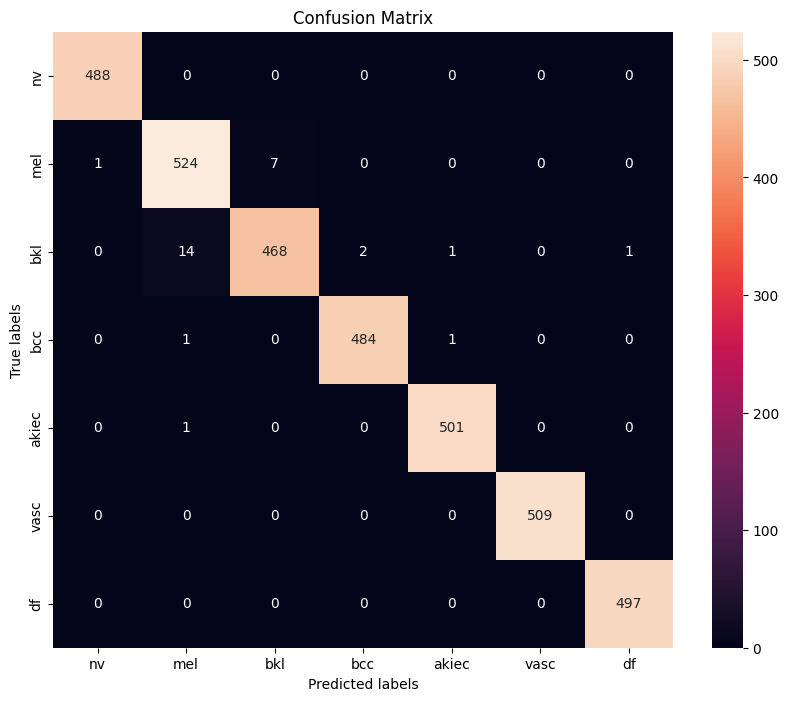

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes)

# Plot the confusion matrix using Seaborn
# sns.heatmap(cm, annot=True, cmap='Blues')
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

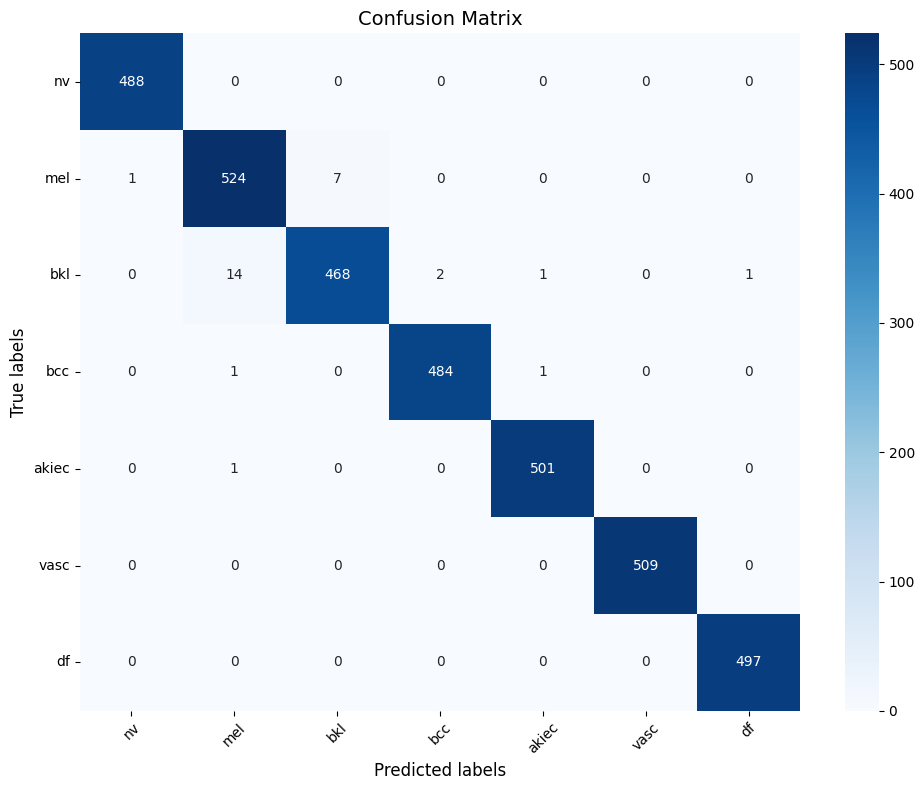

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping of labels
plt.show()


In [94]:
import numpy as np

# Assuming y_predict and y_test are arrays containing predicted and true labels respectively
# Convert one-hot encoded predictions back to class labels
y_predict_classes = np.argmax(y_predict, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Initialize variables to store TP, TN, FP, FN for each class
TP = np.zeros(7)
TN = np.zeros(7)
FP = np.zeros(7)
FN = np.zeros(7)

# Calculate TP, TN, FP, FN for each class
for i in range(7):
    TP[i] = np.sum((y_predict_classes == i) & (y_test_classes == i))
    TN[i] = np.sum((y_predict_classes != i) & (y_test_classes != i))
    FP[i] = np.sum((y_predict_classes == i) & (y_test_classes != i))
    FN[i] = np.sum((y_predict_classes != i) & (y_test_classes == i))

# Calculate total TP, TN, FP, FN across all classes
total_TP = np.sum(TP)
total_TN = np.sum(TN)
total_FP = np.sum(FP)
total_FN = np.sum(FN)

print("Total True Positives (TP):", total_TP)
print("Total True Negatives (TN):", total_TN)
print("Total False Positives (FP):", total_FP)
print("Total False Negatives (FN):", total_FN)


Total True Positives (TP): 3472.0
Total True Negatives (TN): 20972.0
Total False Positives (FP): 28.0
Total False Negatives (FN): 28.0


### Find Out Which Skin Lesion Category had the Most Accurate Label Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import pandas as pd
import seaborn as sns
import os
import itertools
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras import backend
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, model_from_json, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, Callback, CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3, ResNet152V2, VGG16

#To see the value of multiple statements at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def cal_true_pred_classes(model, x_test_normalized, y_test):
    #Predict the values from the testing set
    y_predict = model.predict(x_test_normalized)

    #Convert prediction classes to one hot vectors 
    y_predict_classes = np.argmax(y_predict, axis = 1) 

    #Convert testing label observations to one hot vectors
    y_true_classes = np.argmax(y_test, axis = 1) 
    
    return y_predict_classes, y_true_classes

In [ ]:
def create_confusion_matrix(model, x_test_normalized, y_test, cm_plot_labels, name):
    #Get the true and predicted labels
    y_predict_classes, y_true_classes = cal_true_pred_classes(model, x_test_normalized, y_test)

    #Compute the confusion matrix
    confusion_matrix_computed = confusion_matrix(y_true_classes, y_predict_classes)

    #Plot the confusion matrix
    plot_confusion_matrix(confusion_matrix_computed, cm_plot_labels, name) 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          name,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
#     b, t = plt.ylim()
#     b += 0.5
#     t -= 0.5
#     plt.ylim(b, t)
    
    plt.tight_layout()
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    fig = plt
    fig.savefig('../Photos/' + name + '_confusion_matrix.png', dpi=300)

In [ ]:
def gen_classification_report(model, x_test_normalized, y_test, cm_plot_labels):
    
    #Get the true and predicted labels
    y_predict_classes, y_true_classes = cal_true_pred_classes(model, x_test_normalized, y_test)
    
    #Generate report
    report = classification_report(y_true_classes, y_predict_classes, target_names = cm_plot_labels)
    print(report)

In [ ]:
def plot_label_classification_acc(model, x_test_normalized, y_test, cm_plot_labels, name):

    #Get the true and predicted labels
    y_predict_classes, y_true_classes = cal_true_pred_classes(model, x_test_normalized, y_test)
        
    #Compute the confusion matrix
    confusion_matrix_computed = confusion_matrix(y_true_classes, y_predict_classes)

    #Calculation confusion matrix prediction error
    cm_prediction_error = (np.diag(confusion_matrix_computed) / np.sum(confusion_matrix_computed, axis=1))* 100

    #Bar plot
    plt.bar(np.arange(7), cm_prediction_error)

    #Plot title and labels
    plt.title(name)
    plt.xlabel('True Labels')
    plt.ylabel('Classified Labels %')
    
    #Save figure
    fig = plt
    fig.savefig('../Photos/' + name + '_label_classification_accuracy.png', dpi=300)

In [ ]:
cm_plot_labels=['akiec', 'bcc', 'bkl', 'df', 'nv','mel', 'vasc']

In [ ]:
model_name = "Ensemble_Model"

In [ ]:
plot_label_classification_acc(ensemble_model, x_test, y_test, cm_plot_labels, model_name)

In [ ]:
label_map = {'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3, 'akiec': 4, 'vasc': 5, 'df': 6}

In [24]:
from PIL import Image
import keras
import numpy as np

image_path1 = r"F:\Capstone\Code_final\Code\ISIC_0000004.jpg"
image_path2 = r"F:\Capstone\Code_final\Code\ISIC_0010491.jpg"
image_path3 = r"F:\Capstone\Code_final\Code\ISIC_0025971.jpg"

model1 = keras.models.load_model(r"F:\Capstone\Code_final\Archive\Finetune_Densene.h5")
pre_img1 = (np.array(Image.open(image_path1).resize((100, 75)), dtype=np.float32) - 162.57063208888889) / 41.96703347421026
pre_img2 = (np.array(Image.open(image_path2).resize((100, 75)), dtype=np.float32) - 162.57063208888889) / 41.96703347421026
pre_img3 = (np.array(Image.open(image_path3).resize((100, 75)), dtype=np.float32) - 162.57063208888889) / 41.96703347421026


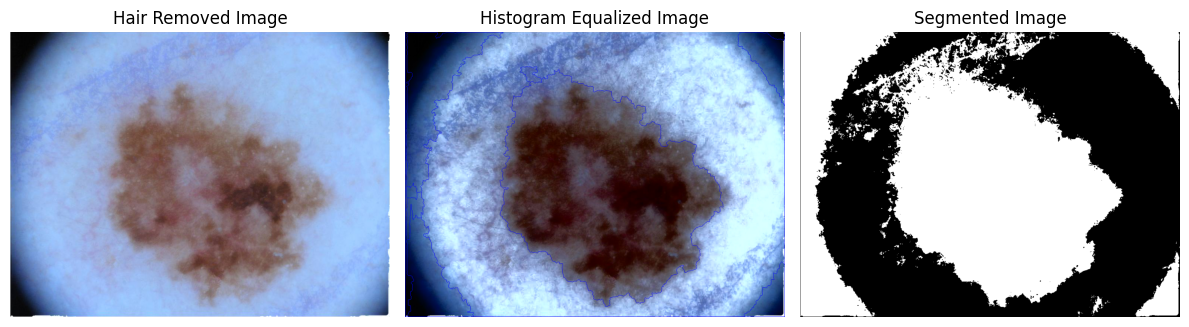

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hair_removal(image_path):
    # Read the input image
    img = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1, (17, 17))

    # Perform the blackHat filtering on the grayscale image to find the hair contours
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    # Intensify the hair contours in preparation for the inpainting algorithm
    ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

    # Inpaint the original image depending on the mask
    dst = cv2.inpaint(img, thresh2, 1, cv2.INPAINT_TELEA)

    return dst

def process_image_and_segment(img):
    # Convert image to YUV color space
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # Apply Histogram Equalization to Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # Convert image back to BGR color space
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    # Convert image to grayscale
    gray = cv2.cvtColor(img_output, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological closing
    kernel = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    sure_bg = cv2.dilate(closing, kernel, iterations=3)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 3)
    ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Subtract the foreground from the background to get the unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Perform marker-based watershed segmentation
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(img_output, markers)
    img_output[markers == -1] = [255, 0, 0]

    # Convert BGR to RGB for displaying with matplotlib
    img_output_rgb = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)

    return img_output_rgb, thresh

# Get input image path from user
image_path = r"F:\Capstone\Code_final\Code\ISIC_0000002.jpg"
# Perform hair removal on the input image
hair_removed_img = hair_removal(image_path)

# Process the hair-removed image and perform histogram equalization and segmentation
segmented_img, threshold_img = process_image_and_segment(hair_removed_img)

# Display the hair-removed image, histogram equalized image, and segmented image
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(hair_removed_img, cv2.COLOR_BGR2RGB))
plt.title('Hair Removed Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(segmented_img)
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(threshold_img, 'gray')
plt.title("Segmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
pre_img1.shape = (1,75, 100, 3)
model1.predict(pre_img1).argmax()

1/1 [==============================] - 3s 3s/step


1

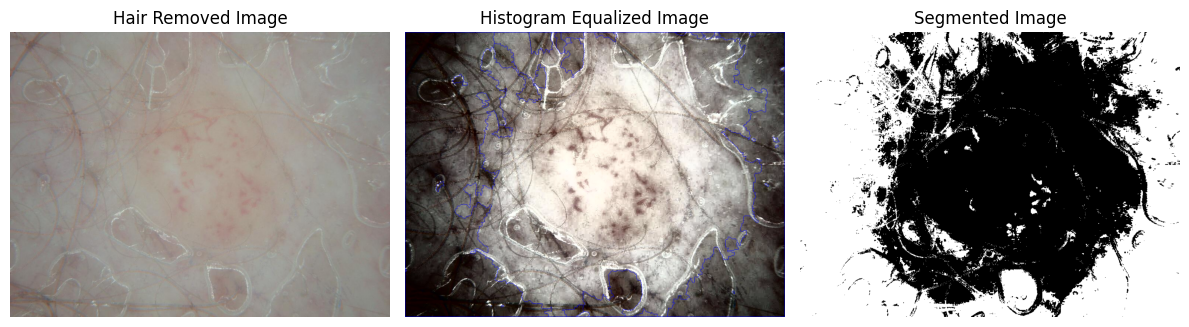

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hair_removal(image_path):
    # Read the input image
    img = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1, (17, 17))

    # Perform the blackHat filtering on the grayscale image to find the hair contours
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    # Intensify the hair contours in preparation for the inpainting algorithm
    ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

    # Inpaint the original image depending on the mask
    dst = cv2.inpaint(img, thresh2, 1, cv2.INPAINT_TELEA)

    return dst

def process_image_and_segment(img):
    # Convert image to YUV color space
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # Apply Histogram Equalization to Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # Convert image back to BGR color space
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    # Convert image to grayscale
    gray = cv2.cvtColor(img_output, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological closing
    kernel = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    sure_bg = cv2.dilate(closing, kernel, iterations=3)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 3)
    ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Subtract the foreground from the background to get the unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Perform marker-based watershed segmentation
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(img_output, markers)
    img_output[markers == -1] = [255, 0, 0]

    # Convert BGR to RGB for displaying with matplotlib
    img_output_rgb = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)

    return img_output_rgb, thresh

# Get input image path from user
image_path = r"F:\Capstone\Code_final\Code\ISIC_0010491.jpg"
# Perform hair removal on the input image
hair_removed_img = hair_removal(image_path)

# Process the hair-removed image and perform histogram equalization and segmentation
segmented_img, threshold_img = process_image_and_segment(hair_removed_img)

# Display the hair-removed image, histogram equalized image, and segmented image
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(hair_removed_img, cv2.COLOR_BGR2RGB))
plt.title('Hair Removed Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(segmented_img)
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(threshold_img, 'gray')
plt.title("Segmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [28]:
pre_img2.shape = (1,75, 100, 3)
model1.predict(pre_img2).argmax()

1/1 [==============================] - 4s 4s/step


2

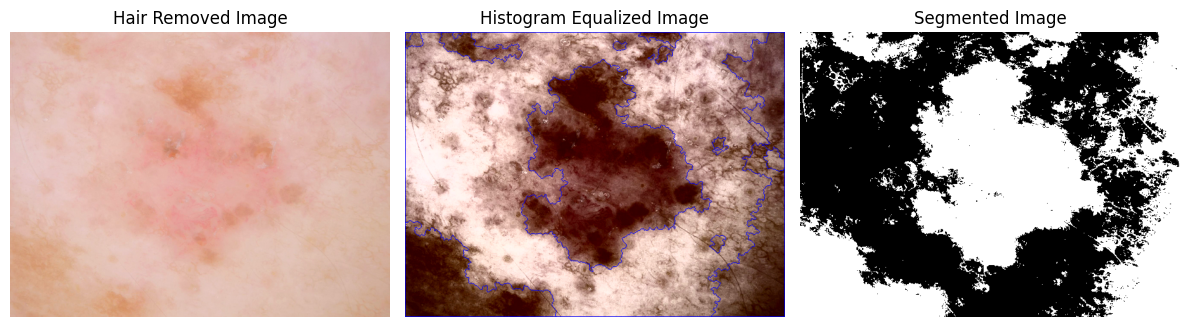

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hair_removal(image_path):
    # Read the input image
    img = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1, (17, 17))

    # Perform the blackHat filtering on the grayscale image to find the hair contours
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    # Intensify the hair contours in preparation for the inpainting algorithm
    ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

    # Inpaint the original image depending on the mask
    dst = cv2.inpaint(img, thresh2, 1, cv2.INPAINT_TELEA)

    return dst

def process_image_and_segment(img):
    # Convert image to YUV color space
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # Apply Histogram Equalization to Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # Convert image back to BGR color space
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    # Convert image to grayscale
    gray = cv2.cvtColor(img_output, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological closing
    kernel = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    sure_bg = cv2.dilate(closing, kernel, iterations=3)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 3)
    ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Subtract the foreground from the background to get the unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Perform marker-based watershed segmentation
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(img_output, markers)
    img_output[markers == -1] = [255, 0, 0]

    # Convert BGR to RGB for displaying with matplotlib
    img_output_rgb = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)

    return img_output_rgb, thresh

# Get input image path from user
image_path =  r"F:\Capstone\Code_final\Code\ISIC_0025971.jpg"
# Perform hair removal on the input image
hair_removed_img = hair_removal(image_path)

# Process the hair-removed image and perform histogram equalization and segmentation
segmented_img, threshold_img = process_image_and_segment(hair_removed_img)

# Display the hair-removed image, histogram equalized image, and segmented image
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(hair_removed_img, cv2.COLOR_BGR2RGB))
plt.title('Hair Removed Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(segmented_img)
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(threshold_img, 'gray')
plt.title("Segmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
pre_img3.shape = (1,75, 100, 3)
model1.predict(pre_img3).argmax()

1/1 [==============================] - 0s 103ms/step


3

In [ ]:
print("350/350 [==============================] - 70s 194ms/step - loss: 0.2134 - accuracy: 0.9557")
print("DenseNet Train: accuracy = 0.965714  ;  loss = 0.213369")
print("350/350 [==============================] - 24s 68ms/step - loss: 0.1685 - accuracy: 0.9442")
print("InceptionV3 Train: accuracy = 0.944196  ;  loss = 0.168487")
print("350/350 [==============================] - 190s 541ms/step - loss: 0.1611 - accuracy: 0.9591")
print("VGG16 Train: accuracy = 0.959107  ;  loss = 0.161087")
print("350/350 [==============================] - 255s 724ms/step - loss: 0.3941 - accuracy: 0.9790")
print("Ensemble Train: accuracy = 0.979018  ;  loss = 0.394089")

In [ ]:
print("110/110 [==============================] - 25s 213ms/step - loss: 0.1989 - accuracy: 0.9557")
print("DenseNet Test: accuracy = 0.960714  ;  loss = 0.198926")
print("110/110 [==============================] - 9s 77ms/step - loss: 0.1730 - accuracy: 0.9454")
print("InceptionV3 Test: accuracy = 0.945429  ;  loss = 0.173037")
print("110/110 [==============================] - 57s 514ms/step - loss: 0.1714 - accuracy: 0.9583")
print("VGG16 Test: accuracy = 0.953286  ;  loss = 0.171369")
print("110/110 [==============================] - 83s 746ms/step - loss: 0.3931 - accuracy: 0.9814")
print("Ensemble Test: accuracy = 0.981429  ;  loss = 0.393099")

In [ ]:
print("88/88 [==============================] - 21s 226ms/step - loss: 0.1869 - accuracy: 0.9604")
print("DenseNet Validation: accuracy = 0.960357  ;  loss = 0.186871")
print("88/88 [==============================] - 8s 83ms/step - loss: 0.1736 - accuracy: 0.9468")
print("InceptionV3 Validation: accuracy = 0.946786  ;  loss = 0.173569")
print("88/88 [==============================] - 47s 540ms/step - loss: 0.1795 - accuracy: 0.9491")
print("VGG16 Validation: accuracy = 0.949143  ;  loss = 0.179545")
print("88/88 [==============================] - 76s 858ms/step - loss: 0.3943 - accuracy: 0.9800")
print("Ensemble Train: accuracy = 0.980000  ;  loss = 0.394287")